# **PREDICTION DES VENTES MENSUELLES**

**MODELE ARIMA**

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour analyser et prévoir les séries chronologiques. Il s’appuie sur les valeurs passées de la série(modèle AR), les erreurs précédentes (modèle MA) et une transformation des données (différenciation I)  afin de capturer la tendance et la dynamique globale de la série.

**Composantes du modèle ARIMA**:

**AR (Autorégression)**,
cette composante utilise les valeurs passées de la série pour prédire la valeur actuelle. Elle permet de modéliser la dépendance entre les observations dans le temps.

**MA (Moyenne mobile)**,
la composante MA s’appuie sur les erreurs passées du modèle pour ajuster les prévisions. Elle permet de capturer les fluctuations non expliquées par l’autorégression.

**I (Différenciation)**,
la différenciation sert à rendre la série stationnaire en supprimant la tendance et les variations de long terme. Elle consiste à calculer les différences entre observations successives.

**Paramètres du modèle ARIMA**:

Le modèle ARIMA est défini par trois paramètres : p, d et q.

**p** : nombre de valeurs passées utilisées (autorégression)

**d** : nombre de différenciations nécessaires pour stationnariser la série

**q** : nombre d’erreurs passées prises en compte (moyenne mobile


# **Méthodologie**

Elle se déroule en trois grandes étapes :

**1-Identification du modèle**

Analyse des données : examiner la série pour détecter tendances, saisonnalités et anomalies. Dans un sens, étudier la stationnarité

**Différenciation** : si la série n’est pas stable ou stationnaire, appliquer une différenciation pour la rendre stationnaire.

**Choix des ordres (p, d, q)** : utiliser les graphiques ACF et PACF pour déterminer combien de valeurs passées et d’erreurs doivent entrer dans le modèle.

**2-stimation du modèle**

Estimer les paramètres du modèle ARIMA à l’aide de méthodes statistiques (comme les moindres carrés) pour que le modèle corresponde au mieux aux données.

**3-Vérification et validation**

Diagnostic : vérifier que les résidus (erreurs) sont aléatoires et ne présentent pas de structure.

Réajustement : si nécessaire, modifier les ordres du modèle et recommencer.

Validation : tester les performances du modèle à  travers la courbe du residu.

Cette méthodologie est itérative : on répète les étapes jusqu’à obtenir un modèle ARIMA qui capture correctement les motifs de la série et permet de faire des prévisions fiables.

# ***PRÉSENTATION ET CHARGEMENT DES DONNÉES***

Les données sont des séries mensuelles. C'est une base univariée, c'est à dire comportant une seule variable "ventes" et donc adapté à un modèle ARIMA. Elle contient deux colonnes:

**Mois**: date et donc le mois et année de chaque vente

**Vente**: la quantité vendue durant le mois
Les données couvrent janvier 2015 à janvier 2026


# **ÉTAPE 1**: Identification du modèle

In [69]:
##Importation des bibliothèques nécessaires pour le travaille
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")



In [70]:
#téléchargement du fichier
from google.colab import files
uploaded = files.upload()

Saving Classeur1.xlsx to Classeur1 (3).xlsx


In [71]:
##lecture du fichier importé
df = pd.read_excel('Classeur1.xlsx')

In [72]:
df.head(5)

,Mois,Vente
0,2015-01,14034
1,2015-02,11588
2,2015-03,19736
3,2015-04,20892
4,2015-05,20962


In [73]:
##Vérification des types de données

df.dtypes


,0
Mois,object
Vente,int64


In [74]:

# Transformer 'Mois' en datetime et 'Vente' en numérique
df["Mois"] = pd.to_datetime(df["Mois"], format="%Y-%m")
df["Vente"] = pd.to_numeric(df["Vente"])

In [75]:
# Mettre la colonne 'Mois' comme index
df.set_index("Mois", inplace=True)

# Vérifier le résultat final
print("\nDataFrame nettoyé :")
print(df.head())
print("\nTypes de données :")
print(df.dtypes)


DataFrame nettoyé :
            Vente
Mois             
2015-01-01  14034
2015-02-01  11588
2015-03-01  19736
2015-04-01  20892
2015-05-01  20962

Types de données :
Vente    int64
dtype: object


In [76]:
##Nous sommes arrivés à transformer les données afin d'obtenir le format que nous voulons. La colonne vente devient entier et mois devient date
##Nous cherchons les données manquantes et en double
print("\nles valeurs nules :")
print(df.isnull().sum())
print("\nles valeurs en double :")
print(df.duplicated().sum())


les valeurs nules :
Vente    0
dtype: int64

les valeurs en double :
0


Le resultat montre qu'il n'y a ni de données manquantes ni de doublons

In [77]:
##Description de données
df.describe()

,Vente
count,131.000000
mean,7628.213740
std,3955.691078
min,1007.000000
25%,5201.000000
50%,7043.000000
75%,8819.500000
max,21371.000000


**Explication du Resultat**

count = 131
Nous avons 131 observations, donc 131 mois de ventes.

mean = 7628.21
La vente moyenne mensuelle est d’environ 7 628 unités.

std = 3955.69
L’écart type est assez élevé, presque la moitié de la moyenne.
→ Cela signifie que les ventes varient beaucoup d’un mois à l’autre.

min = 1007 et max = 21 371
La plus petite vente sur un mois est 1 007, la plus grande 21 371.
→ Les ventes peuvent fortement fluctuer.

25% = 5 201, 50% = 7 043, 75% = 8 819.5
Les quartiles :

25 % des mois ont des ventes ≤ 5 201

50 % des mois ont des ventes ≤ 7 043 (médiane)

75 % des mois ont des ventes ≤ 8 819.5

En résumé :

Les ventes sont très variables, il y a une grosse différence entre les mois faibles et les mois forts.

La médiane (7 043) est un peu plus basse que la moyenne (7 628), ce qui suggère que la distribution est légèrement décalée vers les valeurs élevées (quelques pics très hauts).

**REPRESENTATION GRAPHIQUE ET ANALYSE DE LA SAISONNALITE**

Nous allons représenter le gaphique de vente et étudier son comportement. Elles sont saisonière ou stables

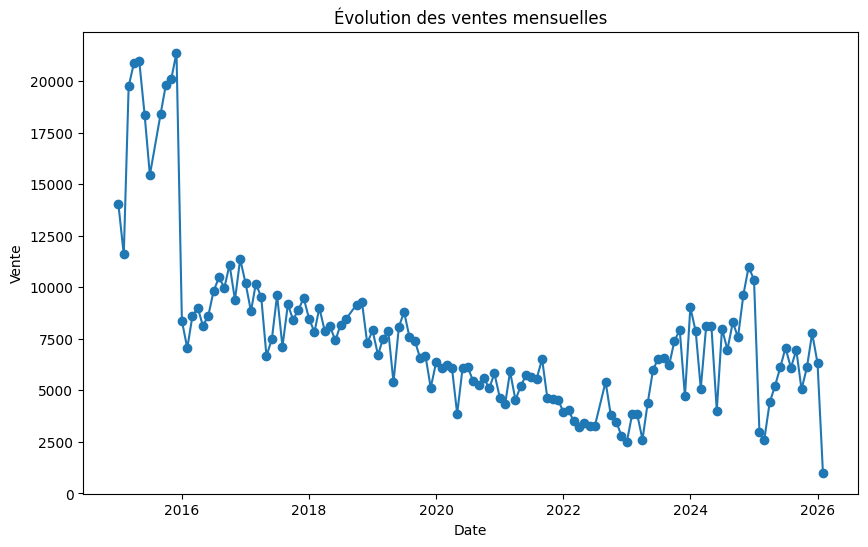

In [78]:
##Graphque d'évolution des ventes durant la période

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Vente'], marker='o', linestyle='-')
plt.title('Évolution des ventes mensuelles')
plt.xlabel('Date')
plt.ylabel('Vente')
plt.grid(False)
plt.show()

ACF et PACF

L’ACF (fonction d’autocorrélation) et la PACF (fonction d’autocorrélation partielle) sont des outils très utiles pour comprendre comment les valeurs d’une série temporelle dépendent des valeurs passées.

ACF (Autocorrelation Function)

L’ACF mesure à quel point les données sont similaires à elles-mêmes à différents décalages dans le temps.

Pour un décalage k, l’ACF indique la corrélation entre la série et elle-même décalée de k périodes.

Exemple : une ACF de 0,9 à k = 2 signifie que la valeur d’aujourd’hui est très similaire à celle d’il y a deux périodes.

PACF (Partial Autocorrelation Function)

La PACF mesure la corrélation en isolant l’effet des valeurs intermédiaires.

Pour un décalage k, la PACF montre la corrélation entre la série et elle-même décalée de k, après avoir retiré l’influence des décalages 1 à k-1.

Exemple : une PACF de 0,5 à k = 3 signifie qu’après avoir pris en compte les 2 périodes précédentes, la valeur d’aujourd’hui et celle d’il y a trois périodes sont moyennement liées.

Ces graphiques servent à:

Les graphes ACF et PACF aident à choisir les paramètres du modèle ARIMA/SARIMA :

L’ACF sert à identifier le terme MA (moyenne mobile)

La PACF sert à identifier le terme AR (auto-régressif)
 **En gros** :

ACF = “c'est comme si nous regardons  tous les effets du passé”

PACF = “ l’effet direct du passé, en enlevant les intermédiaires”

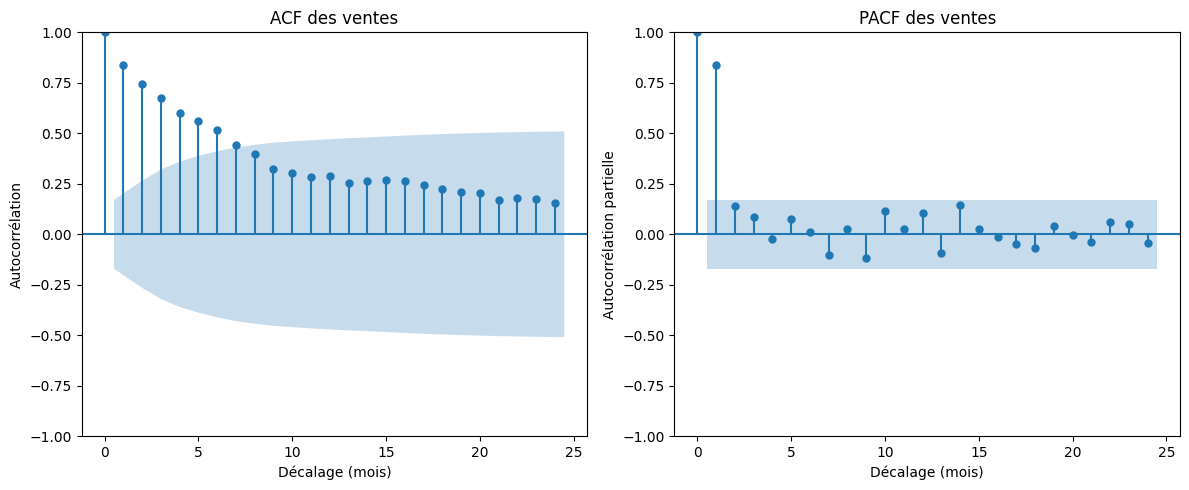

In [79]:

# Taille des graphiques
plt.figure(figsize=(12,5))

# Graphique ACF: autocorrelation simple
plt.subplot(1,2,1)
plot_acf(df["Vente"], lags=24, ax=plt.gca())
plt.title("ACF des ventes")
plt.xlabel("Décalage (mois)")
plt.ylabel("Autocorrélation")

# Graphique PACF: autocorrelation partielle
plt.subplot(1,2,2)
plot_pacf(df["Vente"], lags=24, ax=plt.gca(), method='ywm')
plt.title("PACF des ventes")
plt.xlabel("Décalage (mois)")
plt.ylabel("Autocorrélation partielle")

plt.tight_layout()
plt.show()


L’analyse des graphiques ACF et PACF montre que les ventes mensuelles sont fortement dépendantes des mois précédents. L’ACF décroît progressivement avec les décalages et les 7 premiers mois sont significatifs, ce qui indique une influence des valeurs passées sur la série. La PACF présente deux barres significatives, la première étant plus élevée, ce qui suggère que les ventes du mois précédent ont le plus d’effet, et le mois d’il y a deux mois a également une influence moindre. Ces résultats indiquent une série principalement auto-régressive avec une mémoire courte, et la présence probable d’une saisonnalité annuelle, comme attendu pour des données mensuelles. Nous allons décomposé la série pour bien cerner les caractéristique: saisonnalité, residu, etc.

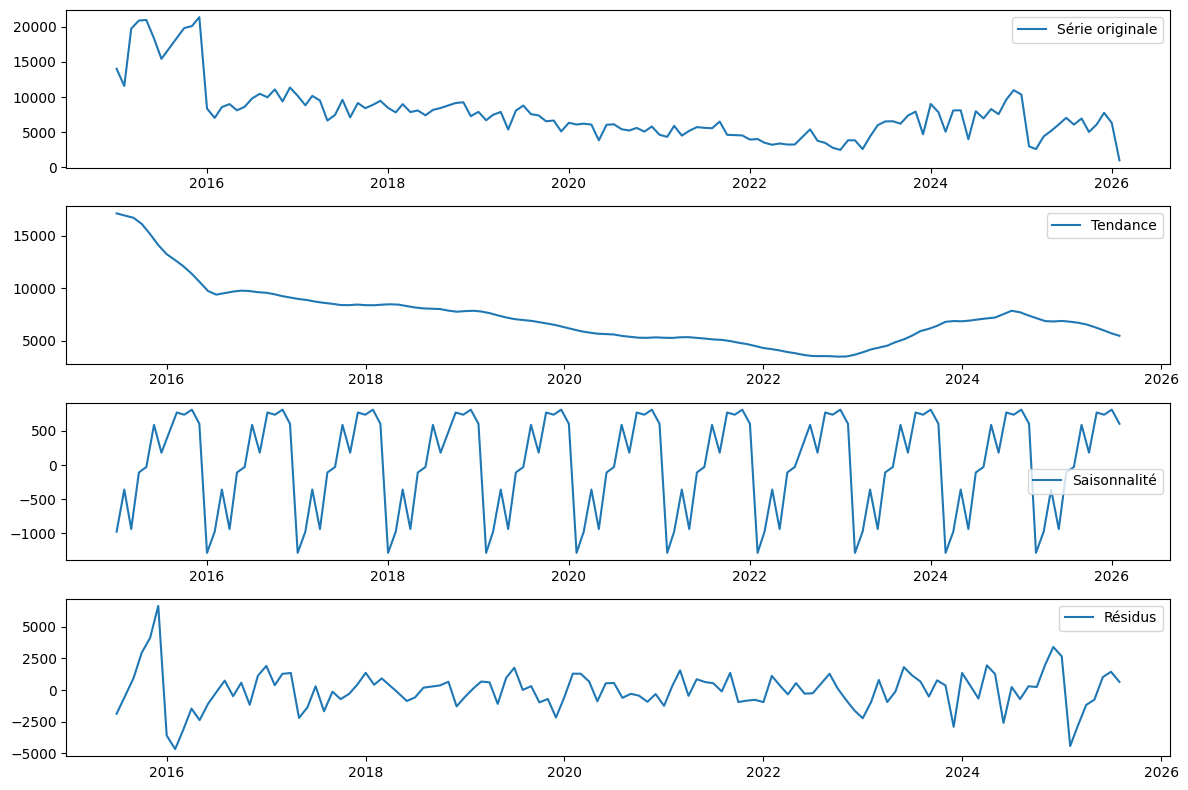

In [80]:
# Effectuer la décomposition saisonnière. Nous choississons le modèle additif puis que les pics sont constant, pas de grandes amplitudes
decomposition = seasonal_decompose(df['Vente'], model='additive', period=12)

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Vente'], label='Série originale')
plt.legend(loc='best') ##demande à Matplotlib de placer automatiquement la légende à l’endroit où on peut le lire facilement

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

**Explication du graphique**:

**1️-Tendance**

La ligne de tendance montre que, globalement, les ventes baissent sur le long terme.

Même si certains mois ont des pics, la moyenne générale diminue au fil des années.

Implication : le modèle devra prendre en compte cette baisse pour prévoir correctement les mois futurs.

**2️-Saisonnalité**

Les composantes saisonnières montrent des cycles réguliers : hausse, baisse, hausse… chaque année ou chaque période.

Cela indique que certains mois ont toujours tendance à être plus forts ou plus faibles, indépendamment de la tendance générale. Donc on peut utiliser le modèle SARIMA pour prévoir les ventes

Exemple : si chaque décembre les ventes montent, même si globalement la tendance baisse, SARIMA peut capturer ce pic annuel.

**3️-Résidus**

Les résidus représentent les fluctuations imprévisibles, après avoir retiré tendance et saisonnalité.

Les résidus oscillent autour de zéro et sans motif clair, c’est parfait.

Cela montre que la série est bien expliquée par la tendance et la saisonnalité, et que ce qui reste est aléatoire.

# ***ÉTAPE2: ESTIMATION DU MODELE***

Avant d'estimer le moèle, nous allons d'abord choisir les paramètres p et q de AR et MA.

**1️ Choix des paramètres initiaux**

D’après les graphiques :

AR (p) = 2 → PACF montre deux pics significatifs

MA (q) = 0 → ACF décroît progressivement, pas de pic clair

Saison mensuelle : s = 12 (1 an)

Composantes saisonnières : P=1 (1 pic dans ACF saisonnier), D=1 (pour rendre la saison stable), Q=0

Donc SARIMA(p,d,q)(P,D,Q,s) = (2,1,0)(1,1,0,12)

AN: Pour SARIMA, on a pas besoin de différencier le modèle, on va le faire directaement dans l'estimation et l'ordre 1 suffit.

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Créer le modèle SARIMA
model = SARIMAX(df["Vente"],
                order=(2,1,0),
                seasonal_order=(1,1,0,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Estimer le modèle
model_fit = model.fit(disp=False)

# Afficher le résumé du modèle
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Vente   No. Observations:                  131
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -919.880
Date:                            Tue, 10 Feb 2026   AIC                           1847.759
Time:                                    14:45:45   BIC                           1858.337
Sample:                                         0   HQIC                          1852.044
                                            - 131                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4280      0.089     -4.793      0.000      -0.603      -0.253
ar.L2         -0.3489      0.085   

**Interprétation du modèle SARIMAX**

Le modèle SARIMAX(2,1,0)x(1,1,0,12) a été ajusté sur 131 mois de ventes.

Coefficients estimés :

ar.L1 = -0.428 : la valeur du mois précédent influence négativement le mois courant.

ar.L2 = -0.349 : la valeur d’il y a deux mois influence également le mois courant, moins fortement.

ar.S.L12 = -0.222 : l’effet saisonnier d’il y a 12 mois (même mois l’année précédente) est significatif et négatif.

Tous les coefficients sont statistiquement significatifs (p < 0.001).

Statistiques résiduelles :

Le test de Ljung-Box (Q=0.04, p=0.84) montre que les résidus ne présentent pas d’autocorrélation significative, donc le modèle capture bien la dépendance temporelle.

Le test Jarque-Bera (JB=24.97, p=0.00) indique que les résidus ne suivent pas exactement une distribution normale, ce qui est courant pour des données économiques ou de vente.

La variance des résidus sigma2 = 2.82e+06 montre l’amplitude des fluctuations non expliquées par le modèle.

Conclusion :

Le modèle SARIMAX choisi capture la tendance, la dépendance des valeurs passées et la saisonnalité annuelle.

Les résidus sont globalement aléatoires, ce qui signifie que le modèle est adéquat pour prévoir les ventes mensuelles sur la période suivante.

# **ÉTAPES 3: PRÉVISION**

**Nous allons prévoir les données de février 2026 à décembre 2026**

In [82]:
# Nombre de mois à prévoir
steps = 11

# Générer les dates pour les 11 prochains mois
future_index = pd.date_range(start='2026-02-01',
                             periods=steps, freq='MS')

# Prévisions
forecast = model_fit.get_forecast(steps=steps)
forecast_values = forecast.predicted_mean
forecast_values.index = future_index  # Important ! Mettre le bon index

# Intervalle de confiance
forecast_ci = forecast.conf_int()
forecast_ci.index = future_index



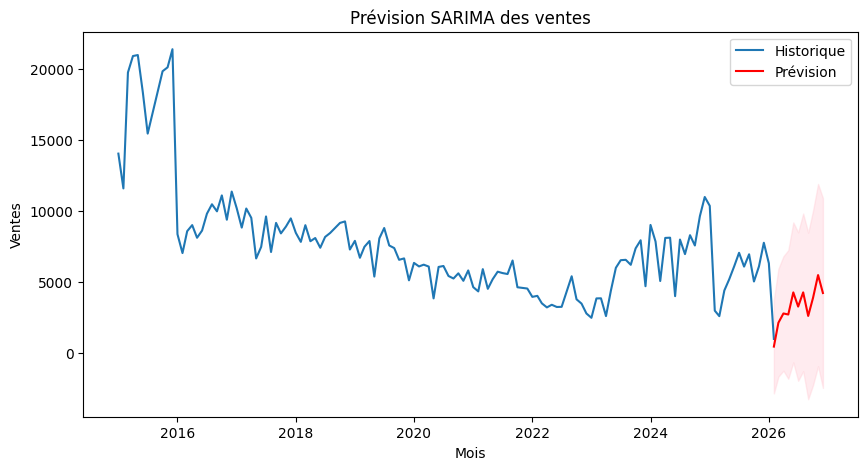

In [83]:
##Tracer la courbe

plt.figure(figsize=(10,5))
plt.plot(df["Vente"], label="Historique")
plt.plot(forecast_values, label="Prévision", color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("Prévision SARIMA des ventes")
plt.xlabel("Mois")
plt.ylabel("Ventes")
plt.legend()
plt.show()


In [84]:
# Créer le tableau des prévisions
forecast_df = pd.DataFrame({
    "Mois": future_index,  # dates des prévisions
    "Vente_prévue": forecast_values.values,
    "IC_inf": forecast_ci.iloc[:,0].values,
    "IC_sup": forecast_ci.iloc[:,1].values
})

# Mettre 'Mois' comme index (optionnel)
forecast_df.set_index("Mois", inplace=True)

# Afficher le tableau
print(forecast_df)


            Vente_prévue       IC_inf        IC_sup
Mois                                               
2026-02-01    470.476428 -2820.641056   3761.593912
2026-03-01   2147.625132 -1643.892175   5939.142439
2026-04-01   2798.982950 -1221.365917   6819.331817
2026-05-01   2726.825486 -1791.474731   7245.125704
2026-06-01   4279.644794  -638.359007   9197.648596
2026-07-01   3283.189352 -1933.694035   8500.072738
2026-08-01   4280.748670 -1260.682473   9822.179812
2026-09-01   2624.897235 -3228.076375   8477.870846
2026-10-01   3901.701761 -2231.507046  10034.910568
2026-11-01   5497.468278  -908.481162  11903.417717
2026-12-01   4236.482623 -2434.072607  10907.037854


**ÉTAPE 4: VALIDATION DU MODELE**

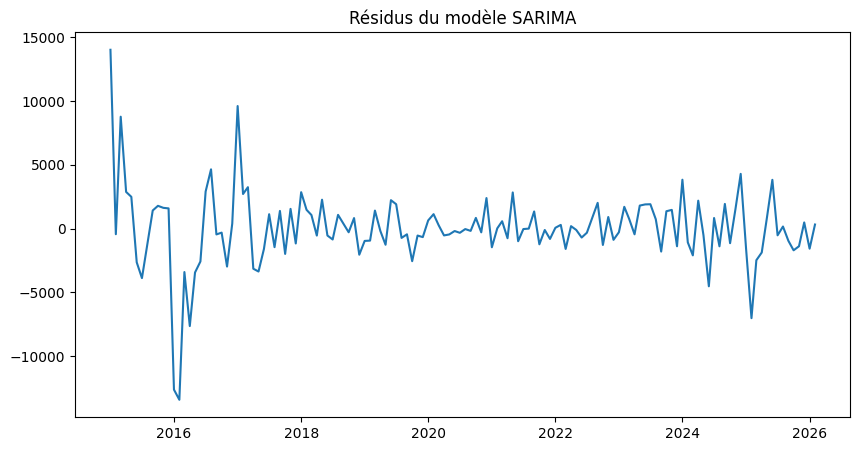

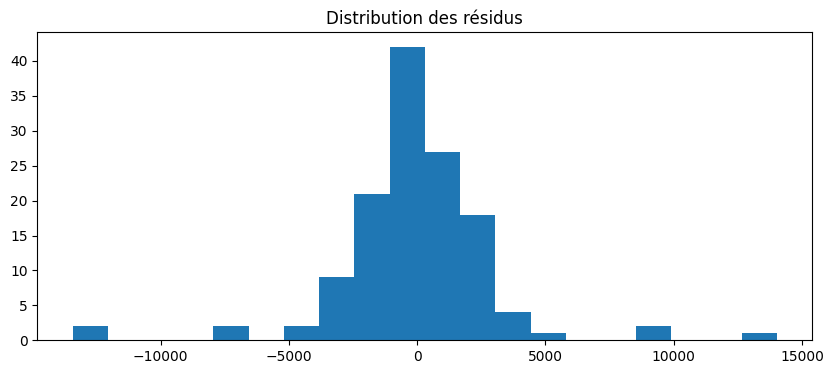

In [85]:
# Graphique des résidus
residuals = model_fit.resid

plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title("Résidus du modèle SARIMA")
plt.show()

# Histogramme des résidus pour vérifier la normalité
plt.figure(figsize=(10,4))
plt.hist(residuals, bins=20)
plt.title("Distribution des résidus")
plt.show()

***Les résidus fluctuent autour de la moyenne et sont normalement distribués. Le modèle est globalement bon***.

**CONCLUSION**

Cette étude a permis de modéliser et de prévoir les ventes mensuelles à l’aide d’un modèle SARIMA, en tenant compte de la tendance, de la dépendance temporelle et de la saisonnalité annuelle. Les résultats montrent que le modèle capture correctement les dynamiques internes de la série, comme le confirment la significativité des coefficients estimés et l’absence d’autocorrélation résiduelle notable.

Cependant, il est essentiel de souligner que les prévisions issues de ce type de modèle reposent sur une hypothèse fondamentale de continuité : le futur est supposé prolonger les comportements observés dans le passé. Dans ce cadre, le modèle ne peut anticiper les chocs exogènes majeurs, les ruptures structurelles ou les événements exceptionnels.

Ainsi, les résultats obtenus doivent être interprétés comme des scénarios probabilistes conditionnels, et non comme des certitudes. L’intégration d’intervalles de confiance permet précisément de quantifier cette incertitude et de rappeler que toute prévision est, par nature, imparfaite. En pratique, ces modèles constituent des outils d’aide à la décision, utiles dans un environnement relativement stable, mais qui doivent être complétés par une analyse qualitative, une veille économique et une capacité d’adaptation face à l’imprévu.

En définitive, la valeur d’un modèle ne réside pas dans sa capacité à prédire les crises, mais dans sa faculté à décrire la structure d’un système en régime normal et à expliciter clairement ses propres limites.